In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Kamir\AppData\Local\Temp\ipykernel_179256\129726228.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
data = pd.read_csv("base de donnée brute.csv", parse_dates=["Date"], index_col="Date")

In [3]:
raw=data["^FCHI"].to_frame().dropna()

In [4]:
raw.rename(columns={"^FCHI":"cac40"},inplace = True)

In [5]:
raw["returns"]=np.log(raw.cac40/raw.cac40.shift())

In [6]:
raw["notation"]=0

In [7]:
c=[]

In [8]:
for i in range(len(raw["cac40"])):
    if raw["returns"].iloc[i] < -0.01 :
        raw["notation"].iloc[i] = 1 
        c.append(raw["returns"].iloc[i])

C:\Users\Kamir\AppData\Local\Temp\ipykernel_179256\2269883710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw["notation"].iloc[i] = 1


In [9]:
c

[-0.03370382977654905,
 -0.019225054789903568,
 -0.015749287328748012,
 -0.010951407658151308,
 -0.011253638225833236,
 -0.013312641652437377,
 -0.015670156195385563,
 -0.018297315683494773,
 -0.02624115387048323,
 -0.021460640845304628,
 -0.012358016820047108,
 -0.010641461744330321,
 -0.025616130540937712,
 -0.013401597174073333,
 -0.012902100681202669,
 -0.014217458799581063,
 -0.01766724040126473,
 -0.010225902607649938,
 -0.03814548345215603,
 -0.01648473435179282,
 -0.02031217115555351,
 -0.022950306337544787,
 -0.025992507058199332,
 -0.01872529012401619,
 -0.03463866728207585,
 -0.017686266485712893,
 -0.02080214320515603,
 -0.03241218910331271,
 -0.054932360780374404,
 -0.014077156000374468,
 -0.024318948592966683,
 -0.02848875479301257,
 -0.014698284143163346,
 -0.010455702329342524,
 -0.025959496208702627,
 -0.03483601957509614,
 -0.01949700901761832,
 -0.02797521384804925,
 -0.010274932887085576,
 -0.01475067102893861,
 -0.019545591729887166,
 -0.010078041249173105,
 -0.014

In [10]:
raw["rolling"]=raw.notation.rolling(window=7).max()

In [11]:
raw["rollinglag"]=raw["rolling"].shift(-6)

In [12]:
raw.head(50)

,cac40,returns,notation,rolling,rollinglag
Date,,,,,
2015-01-02,4252.290039,NaN,0,NaN,1.0
2015-01-05,4111.359863,-0.033704,1,NaN,1.0
2015-01-06,4083.500000,-0.006799,0,NaN,1.0
2015-01-07,4112.729980,0.007133,0,NaN,1.0
2015-01-08,4260.189941,0.035227,0,NaN,1.0
2015-01-09,4179.069824,-0.019225,1,NaN,1.0
2015-01-12,4228.240234,0.011697,0,1.0,1.0
2015-01-13,4290.279785,0.014566,0,1.0,1.0
2015-01-14,4223.240234,-0.015749,1,1.0,1.0


In [13]:
raw["s&p_return"]=np.log(data["^SPX"]/data["^SPX"].shift())
raw["nasdaq_return"]=np.log(data["^IXIC"]/data["^IXIC"].shift())
#raw["Euribor3m_returns"]=np.log(data["0P0000ZLEB.F"]/data["0P0000ZLEB.F"].shift())"


In [14]:
i_vol=yf.download("^VIX","2015-01-02","2023-01-01").Close
raw["ivol_return"]=np.log(i_vol/i_vol.shift())

brent=yf.download("BZ=F","2015-01-02","2023-01-01").Close
raw["brent_return"]=np.log(brent/brent.shift())

lvmh = yf.download("MC.PA","2015-01-02","2023-01-01").Close
raw["LVMH_return"]=np.log(lvmh/lvmh.shift())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
raw

,cac40,returns,notation,rolling,rollinglag,s&p_return,nasdaq_return,ivol_return,brent_return,LVMH_return
Date,,,,,,,,,,
2015-01-02,4252.290039,NaN,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,4111.359863,-0.033704,1,NaN,1.0,-0.018447,-0.015831,0.113088,-0.060458,-0.029471
2015-01-06,4083.500000,-0.006799,0,NaN,1.0,-0.008933,-0.012943,0.058496,-0.038581,-0.011478
2015-01-07,4112.729980,0.007133,0,NaN,1.0,0.011563,0.012491,-0.089597,0.000978,0.000796
2015-01-08,4260.189941,0.035227,0,NaN,1.0,0.017730,0.018265,-0.126822,-0.003722,0.030940
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,6504.899902,-0.002007,0,1.0,NaN,0.005851,0.002073,-0.051365,0.035662,-0.015025
2022-12-27,6550.660156,0.007010,0,1.0,NaN,-0.004058,-0.013873,0.036693,0.004874,0.024048
2022-12-28,6510.490234,-0.006151,0,0.0,NaN,-0.012093,-0.013609,0.022380,-0.012769,-0.005230


In [16]:
raw.fillna(0,inplace=True)

In [17]:
raw

,cac40,returns,notation,rolling,rollinglag,s&p_return,nasdaq_return,ivol_return,brent_return,LVMH_return
Date,,,,,,,,,,
2015-01-02,4252.290039,0.000000,0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,4111.359863,-0.033704,1,0.0,1.0,-0.018447,-0.015831,0.113088,-0.060458,-0.029471
2015-01-06,4083.500000,-0.006799,0,0.0,1.0,-0.008933,-0.012943,0.058496,-0.038581,-0.011478
2015-01-07,4112.729980,0.007133,0,0.0,1.0,0.011563,0.012491,-0.089597,0.000978,0.000796
2015-01-08,4260.189941,0.035227,0,0.0,1.0,0.017730,0.018265,-0.126822,-0.003722,0.030940
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,6504.899902,-0.002007,0,1.0,0.0,0.005851,0.002073,-0.051365,0.035662,-0.015025
2022-12-27,6550.660156,0.007010,0,1.0,0.0,-0.004058,-0.013873,0.036693,0.004874,0.024048
2022-12-28,6510.490234,-0.006151,0,0.0,0.0,-0.012093,-0.013609,0.022380,-0.012769,-0.005230


In [18]:
raw.dropna()

,cac40,returns,notation,rolling,rollinglag,s&p_return,nasdaq_return,ivol_return,brent_return,LVMH_return
Date,,,,,,,,,,
2015-01-02,4252.290039,0.000000,0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,4111.359863,-0.033704,1,0.0,1.0,-0.018447,-0.015831,0.113088,-0.060458,-0.029471
2015-01-06,4083.500000,-0.006799,0,0.0,1.0,-0.008933,-0.012943,0.058496,-0.038581,-0.011478
2015-01-07,4112.729980,0.007133,0,0.0,1.0,0.011563,0.012491,-0.089597,0.000978,0.000796
2015-01-08,4260.189941,0.035227,0,0.0,1.0,0.017730,0.018265,-0.126822,-0.003722,0.030940
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,6504.899902,-0.002007,0,1.0,0.0,0.005851,0.002073,-0.051365,0.035662,-0.015025
2022-12-27,6550.660156,0.007010,0,1.0,0.0,-0.004058,-0.013873,0.036693,0.004874,0.024048
2022-12-28,6510.490234,-0.006151,0,0.0,0.0,-0.012093,-0.013609,0.022380,-0.012769,-0.005230


In [19]:
inflation = pd.read_csv("inflation")
inflation

,Unnamed: 0.1,Unnamed: 0,IPCH,IPC,ISJ
0,0,2023-06,5.3,4.5,5.7
1,1,2023-05,6.0,5.1,5.8
2,2,2023-04,6.9,5.9,6.3
3,3,2023-03,6.7,5.7,6.2
4,4,2023-02,7.3,6.3,6.1
...,...,...,...,...,...
109,109,2014-05,0.8,0.7,0.3
110,110,2014-04,0.8,0.7,0.5
111,111,2014-03,0.8,0.6,0.5
112,112,2014-02,1.1,0.9,0.8


In [20]:
inflation["Unnamed: 0"]=pd.to_datetime(inflation["Unnamed: 0"], format='%Y-%m')
inflation

,Unnamed: 0.1,Unnamed: 0,IPCH,IPC,ISJ
0,0,2023-06-01,5.3,4.5,5.7
1,1,2023-05-01,6.0,5.1,5.8
2,2,2023-04-01,6.9,5.9,6.3
3,3,2023-03-01,6.7,5.7,6.2
4,4,2023-02-01,7.3,6.3,6.1
...,...,...,...,...,...
109,109,2014-05-01,0.8,0.7,0.3
110,110,2014-04-01,0.8,0.7,0.5
111,111,2014-03-01,0.8,0.6,0.5
112,112,2014-02-01,1.1,0.9,0.8


In [21]:
date_debut = inflation["Unnamed: 0"].min()
date_fin = inflation["Unnamed: 0"].max()

In [22]:
dates_journalieres = pd.date_range(start=date_debut, end=date_fin, freq='D')

In [23]:
df_journalier = pd.DataFrame({'Date': dates_journalieres})
df_journalier

,Date
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
3434,2023-05-28
3435,2023-05-29
3436,2023-05-30
3437,2023-05-31


In [24]:
df_journalier = df_journalier.merge(inflation, how='left', left_on=df_journalier['Date'].dt.strftime('%Y-%m'), right_on=inflation["Unnamed: 0"].dt.strftime('%Y-%m'))


In [25]:
df_journalier.to_csv("données journalières inflation")

In [26]:
data = df_journalier[["Date","IPC"]]


In [27]:
data = pd.read_csv("données journalières inflation", parse_dates=["Date"], index_col="Date")

In [28]:
data

,Unnamed: 0.2,key_0,Unnamed: 0.1,Unnamed: 0,IPCH,IPC,ISJ
Date,,,,,,,
2014-01-01,0,2014-01,113,2014-01-01,0.8,0.6,0.2
2014-01-02,1,2014-01,113,2014-01-01,0.8,0.6,0.2
2014-01-03,2,2014-01,113,2014-01-01,0.8,0.6,0.2
2014-01-04,3,2014-01,113,2014-01-01,0.8,0.6,0.2
2014-01-05,4,2014-01,113,2014-01-01,0.8,0.6,0.2
...,...,...,...,...,...,...,...
2023-05-28,3434,2023-05,1,2023-05-01,6.0,5.1,5.8
2023-05-29,3435,2023-05,1,2023-05-01,6.0,5.1,5.8
2023-05-30,3436,2023-05,1,2023-05-01,6.0,5.1,5.8


In [29]:
d=raw[raw["rollinglag"]==1]

In [30]:
f=raw[["returns","s&p_return","nasdaq_return","ivol_return","LVMH_return","brent_return"]]

In [31]:
f["IPC"]=data["IPC"].copy()

C:\Users\Kamir\AppData\Local\Temp\ipykernel_179256\1731091107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f["IPC"]=data["IPC"].copy()


In [32]:
f

,returns,s&p_return,nasdaq_return,ivol_return,LVMH_return,brent_return,IPC
Date,,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.4
2015-01-05,-0.033704,-0.018447,-0.015831,0.113088,-0.029471,-0.060458,-0.4
2015-01-06,-0.006799,-0.008933,-0.012943,0.058496,-0.011478,-0.038581,-0.4
2015-01-07,0.007133,0.011563,0.012491,-0.089597,0.000796,0.000978,-0.4
2015-01-08,0.035227,0.017730,0.018265,-0.126822,0.030940,-0.003722,-0.4
...,...,...,...,...,...,...,...
2022-12-23,-0.002007,0.005851,0.002073,-0.051365,-0.015025,0.035662,5.9
2022-12-27,0.007010,-0.004058,-0.013873,0.036693,0.024048,0.004874,5.9
2022-12-28,-0.006151,-0.012093,-0.013609,0.022380,-0.005230,-0.012769,5.9


In [33]:
f.corr(numeric_only=False)

,returns,s&p_return,nasdaq_return,ivol_return,LVMH_return,brent_return,IPC
returns,1.000000,0.579728,0.510063,-0.476495,0.814969,0.285711,-0.014030
s&p_return,0.579728,1.000000,0.948375,-0.711931,0.490422,0.289431,-0.026814
nasdaq_return,0.510063,0.948375,1.000000,-0.703654,0.466210,0.232810,-0.043914
ivol_return,-0.476495,-0.711931,-0.703654,1.000000,-0.424927,-0.239637,0.001875
LVMH_return,0.814969,0.490422,0.466210,-0.424927,1.000000,0.172672,-0.016430
brent_return,0.285711,0.289431,0.232810,-0.239637,0.172672,1.000000,-0.012289
IPC,-0.014030,-0.026814,-0.043914,0.001875,-0.016430,-0.012289,1.000000


In [34]:
import seaborn as sns

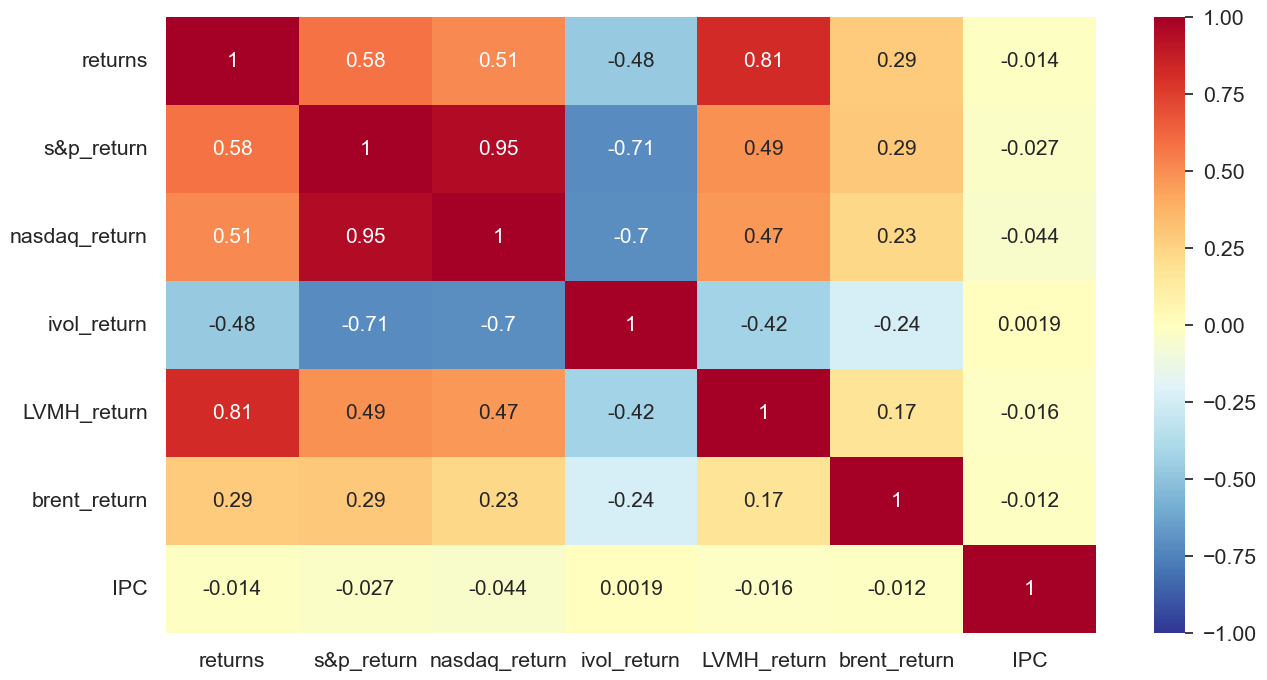

In [35]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
sns.heatmap(f.corr(numeric_only=False), cmap= "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin=-1, vmax=1)
plt.show()

#2 Random forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
train = f.loc[:"31/12/2016"].copy()
test= f.loc["01/01/2016":].copy()

C:\Users\Kamir\AppData\Local\Temp\ipykernel_179256\4275632550.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train = f.loc[:"31/12/2016"].copy()


In [38]:
x_train = train.drop("returns", axis=1)
y_train = train['returns']
x_test = test.drop('returns', axis = 1) # Selecting Predictor Variables
y_test = test['returns']

In [39]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [40]:
#training the model
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
#training accuaracy 
rfr.score(x_train, y_train)

0.9557201812900651

In [42]:
#predecting the cac 40 value
r_pred = rfr.predict(x_test)

In [43]:
dfr=pd.DataFrame({'Actual':y_test, 'Predicted':r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,-0.033633,-0.033008
1,0.003351,0.002260
2,-0.012677,-0.014319
3,-0.017310,-0.015686
4,-0.015982,-0.012988
5,-0.004862,-0.003280
6,0.015190,0.015656
7,0.003008,-0.004310
8,-0.018163,-0.009703
9,-0.024108,-0.015731


C:\Users\Kamir\AppData\Local\Temp\ipykernel_179256\1732417999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color='r', label = 'Actual Price', hist = False)
C:\Users\Kamir\AppData\Local\Temp\ipykernel_179256\1732417999.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

<Axes: xlabel='Predicted', ylabel='Density'>

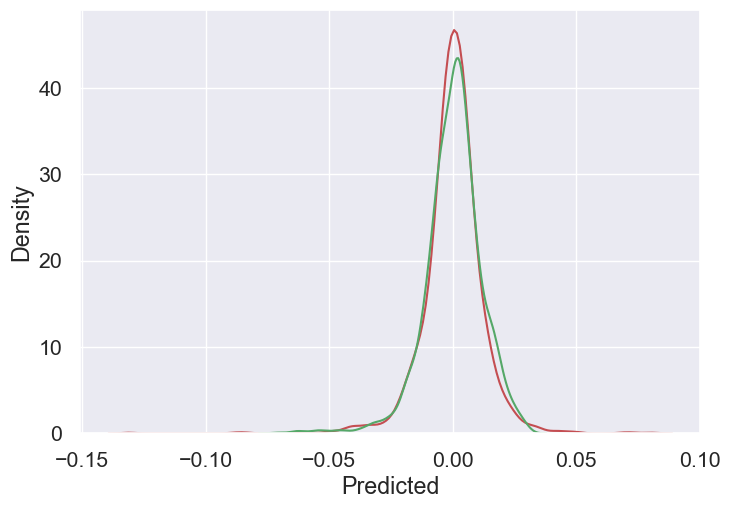

In [44]:
ax = sns.distplot(dfr['Actual'], color='r', label = 'Actual Price', hist = False)
sns.distplot(dfr['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)

In [60]:
y_prob = rfr.predict_proba(X_test)[:, 1]


AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

NameError: name 'y_prob' is not defined

# logistic regression

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
dtr = DecisionTreeRegressor()

Hypertuning the model with GridsearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

# Defining parameters
parameters  = {'max_depth':[2,4,6,8],
               'min_samples_split':[2,4,6,8],
               'min_samples_leaf':[1,2,3,4],
               'max_features':['auto','sqrt','log2'],
               'random_state':[0,42]}

# Creating GridSearchCV object
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='neg_mean_squared_error')

# Fitting data to grid search object
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 42}


C:\Users\Kamir\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kamir\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kamir\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Kamir\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Kamir\anaconda3\Lib\site-packa

In [48]:
# Training the model
dtr.fit(x_train, y_train)


DecisionTreeRegressor()

In [49]:
# Training Accuracy
dtr.score(x_train, y_train)

0.9999361211387846

In [50]:
# Predicting the house price
d_pred = dtr.predict(x_test)

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

NameError: name 'y_prob' is not defined

# Evaluting Decision Tree Regressor Model


In [51]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,-0.033633,-0.033633
1,0.003351,0.003351
2,-0.012677,-0.012677
3,-0.017310,-0.017310
4,-0.015982,-0.015982
5,-0.004862,-0.004862
6,0.015190,0.015190
7,0.003008,0.003008
8,-0.018163,-0.018163
9,-0.024108,-0.024108


C:\Users\Kamir\AppData\Local\Temp\ipykernel_179256\3339549931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
C:\Users\Kamir\AppData\Local\Temp\ipykernel_179256\3339549931.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

<Axes: xlabel='Predicted', ylabel='Density'>

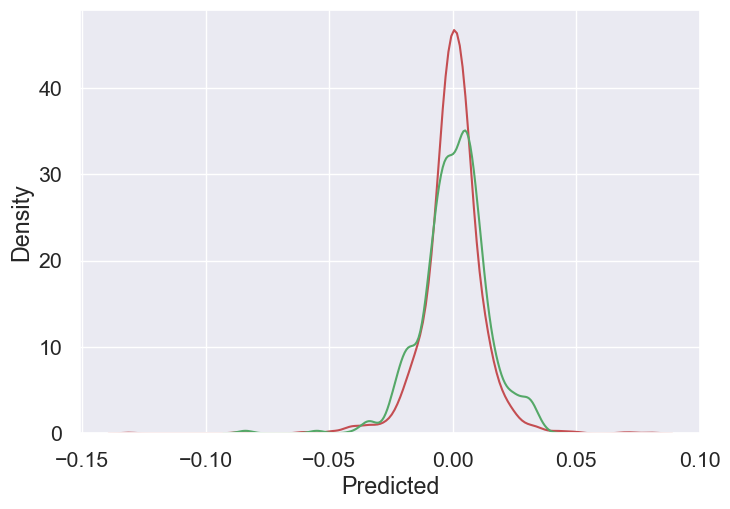

In [52]:
ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dft['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)

In [53]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.364115095570416
Mean Squared Error:  9.629167997711062e-05
Mean Absolute Error:  0.00645107486282371
Root Mean Squared Error:  0.009812832413585316
